In [ ]:
# Enable GPU

import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
# imports

import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.python.keras.backend import categorical_crossentropy
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization, Dropout
import time
from matplotlib import pyplot as plt

In [ ]:
# import ciraf10 image dataset and convert to train/validate/test dataset

(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
totalX = np.concatenate([xTrain, xTest])
totalY = np.concatenate([yTrain, yTest])
#first we split into 70% training data and 30% test data
X_train, X_test_temp, y_train, y_test_temp = train_test_split(totalX, totalY, test_size=0.3, random_state=1)
#then we split the test data into 50% of validate data making it 15% of the total
X_validate, X_test, y_validate, y_test = train_test_split(X_test_temp, y_test_temp, test_size=0.5, random_state=1)

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# preprocess the data

X_train = X_train.reshape(X_train.shape[0], 32,32,3)
X_test = X_test.reshape(X_test.shape[0], 32,32,3)
X_validate = X_validate.reshape(X_validate.shape[0], 32,32,3)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_validate = to_categorical(y_validate)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               460900    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

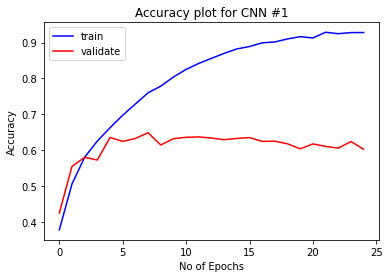

In [ ]:
#create CNN 1 with 2 conv2d layers and no regularization

model1 = Sequential()

model1.add(Conv2D(128, (3,3), activation='relu',input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(100, activation = "relu"))
model1.add(Dense(10, activation = "softmax"))
model1.summary()

model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
start = time.time()
history1 = model1.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_validate, y_validate))
end = time.time()
totalTime = (end-start)/60
print("Total time: " + str(totalTime))

plt.plot(history1.history['accuracy'], color="blue", label="train")
plt.plot(history1.history['val_accuracy'], color="red", label="validate")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for CNN #1")
plt.legend()
plt.show()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

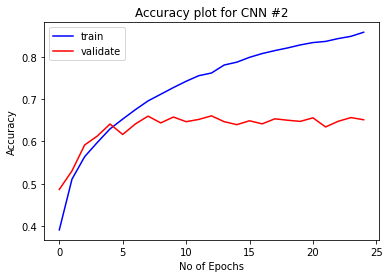

In [ ]:
#create CNN 2 with 3 conv2d layers and no regularization

model2 = Sequential()

model2.add(Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(100, activation = "relu"))
model2.add(Dense(10, activation = "softmax"))
model2.summary()

model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
start = time.time()
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_validate, y_validate))
end = time.time()
totalTime = (end-start)/60
print("Total time: " + str(totalTime))

plt.plot(history2.history['accuracy'], color="blue", label="train")
plt.plot(history2.history['val_accuracy'], color="red", label="validate")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for CNN #2")
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               460900    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

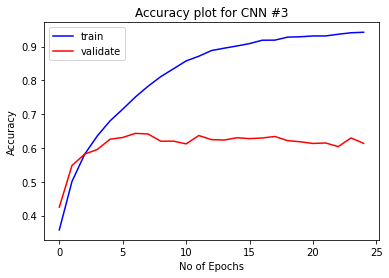

In [ ]:
#create CNN 3 with 2 conv2d layers and L2 regularization

model3 = Sequential()

model3.add(Conv2D(128, (3,3), activation='relu',  input_shape=(32,32,3), kernel_regularizer=regularizers.l2(0.00001)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(100, activation = "relu", kernel_regularizer=regularizers.l2(0.00001)))
model3.add(Dense(10, activation = "softmax"))
model3.summary()

model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
start = time.time()
history3 = model3.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_validate, y_validate))
end = time.time()
totalTime = (end-start)/60
print("Total time: " + str(totalTime))

plt.plot(history3.history['accuracy'], color="blue", label="train")
plt.plot(history3.history['val_accuracy'], color="red", label="validate")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for CNN #3")
plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

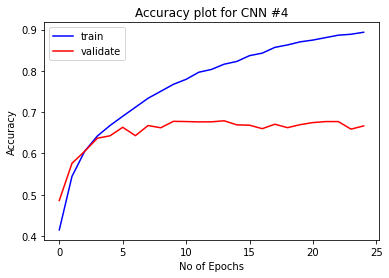

In [ ]:
#create CNN 4 with 3 conv2d layers and L2 regularization

model4 = Sequential()

model4.add(Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3), kernel_regularizer=regularizers.l2(0.00001)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(128, (3,3), activation='relu',  kernel_regularizer=regularizers.l2(0.00001)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(100, activation = "relu", kernel_regularizer=regularizers.l2(0.00001)))
model4.add(Dense(10, activation = "softmax"))
model4.summary()

model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
start = time.time()
history4 = model4.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_validate, y_validate))
end = time.time()
totalTime = (end-start)/60
print("Total time: " + str(totalTime))

plt.plot(history4.history['accuracy'], color="blue", label="train")
plt.plot(history4.history['val_accuracy'], color="red", label="validate")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for CNN #4")
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

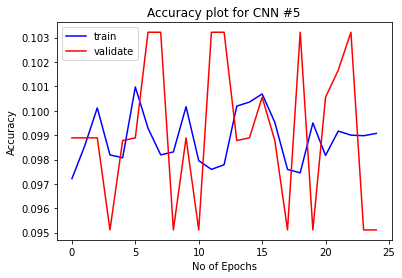

In [ ]:
#create CNN 5 with 2 conv2d layers and Dropout regularization

model5 = Sequential()

model5.add(Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(128, (3,3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(100, activation = "relu"))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation = "softmax"))
model5.summary()

model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
start = time.time()
history5 = model5.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_validate, y_validate))
end = time.time()
totalTime = (end-start)/60
print("Total time: " + str(totalTime))

plt.plot(history5.history['accuracy'], color="blue", label="train")
plt.plot(history5.history['val_accuracy'], color="red", label="validate")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for CNN #5")
plt.legend()
plt.show()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
module_wrapper_32 (ModuleWra (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
module_wrapper_33 (ModuleWra (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 4, 4, 128)       

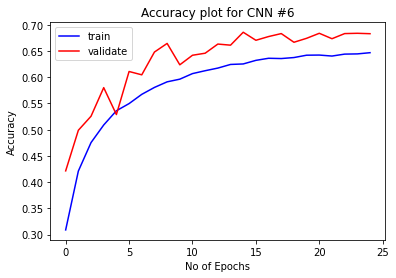

In [ ]:
#create CNN 6 with 3 conv2d layers and Dropout regularization

model6 = Sequential()

model6.add(Conv2D(128, (3,3), activation='relu',input_shape=(32,32,3)))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.2))
model6.add(Conv2D(128, (3,3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.2))
model6.add(Conv2D(128, (3,3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.2))
model6.add(Flatten())
model6.add(Dense(100, activation = "relu"))
model6.add(Dropout(0.2))
model6.add(Dense(10, activation = "softmax"))
model6.summary()

model6.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
start = time.time()
history6 = model6.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_validate, y_validate))
end = time.time()
totalTime = (end-start)/60
print("Total time: " + str(totalTime))

plt.plot(history6.history['accuracy'], color="blue", label="train")
plt.plot(history6.history['val_accuracy'], color="red", label="validate")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for CNN #6")
plt.legend()
plt.show()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
module_wrapper_29 (ModuleWra (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
module_wrapper_30 (ModuleWra (None, 6, 6, 128)         512       
_________________________________________________________________
flatten_27 (Flatten)         (None, 4608)            

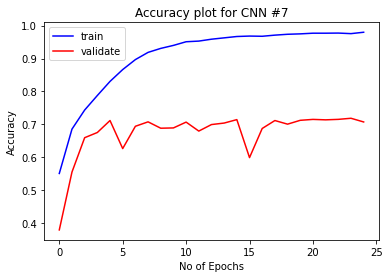

In [ ]:
#create CNN 7 with 2 conv2d layers and Batch regularization

model7 = Sequential()

model7.add(Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(BatchNormalization())
model7.add(Conv2D(128, (3,3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(BatchNormalization())
model7.add(Flatten())
model7.add(Dense(100, activation = "relu"))
model7.add(BatchNormalization())
model7.add(Dense(10, activation = "softmax"))
model7.summary()

model7.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
start = time.time()
history7 = model7.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_validate, y_validate))
end = time.time()
totalTime = (end-start)/60
print("Total time: " + str(totalTime))

plt.plot(history7.history['accuracy'], color="blue", label="train")
plt.plot(history7.history['val_accuracy'], color="red", label="validate")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for CNN #7")
plt.legend()
plt.show()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
module_wrapper_22 (ModuleWra (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
module_wrapper_23 (ModuleWra (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 4, 4, 128)       

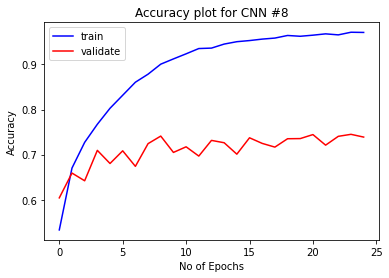

In [ ]:
#create CNN 8 with 3 conv2d layers and Batch regularization

model8 = Sequential()

model8.add(Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(BatchNormalization())
model8.add(Conv2D(128, (3,3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(BatchNormalization())
model8.add(Conv2D(128, (3,3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(BatchNormalization())
model8.add(Flatten())
model8.add(Dense(100, activation = "relu"))
model8.add(BatchNormalization())
model8.add(Dense(10, activation = "softmax"))
model8.summary()

model8.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
start = time.time()
history8 = model8.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_validate, y_validate))
end = time.time()
totalTime = (end-start)/60
print("Total time: " + str(totalTime))

plt.plot(history8.history['accuracy'], color="blue", label="train")
plt.plot(history8.history['val_accuracy'], color="red", label="validate")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for CNN #8")
plt.legend()
plt.show()

In [ ]:

# adding training and validation data
x_train_final = np.concatenate([X_train, X_validate])
y_train_final = np.concatenate([y_train, y_validate])

model9 = Sequential()

model9.add(Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(BatchNormalization())
model9.add(Conv2D(128, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(BatchNormalization())
model9.add(Conv2D(128, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(BatchNormalization())
model9.add(Flatten())
model9.add(Dense(100, activation = "relu"))
model9.add(BatchNormalization())
model9.add(Dense(10, activation = "softmax"))
model9.summary()

model9.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
start = time.time()
history9 = model9.fit(x_train_final, y_train_final, batch_size=32, epochs=25)
end = time.time()
totalTime = (end-start)/60
print("Total time: " + str(totalTime))

score = model9.evaluate(X_test,y_test, verbose=0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % score[1])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         1

In [ ]:
from PIL import Image
from urllib import request
from io import BytesIO

url = "https://post.healthline.com/wp-content/uploads/2020/08/3180-Pug_green_grass-1200x628-FACEBOOK-1200x628.jpg"
res = request.urlopen(url).read()
img = Image.open(BytesIO(res).resize(32,32))
plt.imshow(img)


from keras.preprocessing.image import img_to_array

image = img_to_array(img)
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])


yhat = model9.predict(image)
yhat.shape

